# Used Car Models

### In this notebook:
I will attempt to use car details to predict the price of a used car. I will be using data that I cleaned in another notebook.

In [1]:
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics

print(tf.__version__)

1.12.0


In [2]:
def plot_regression(pred, y, sort=True):
    '''credit to this tutorial: https://www.youtube.com/watch?v=uLa-b3JxWAM'''
    t = pd.DataFrame({'pred' : pred, 'y' : y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    a = plt.plot(t['pred'].tolist(), label='prediction')
    b = plt.plot(t['y'].tolist(), label='true prices')

    plt.ylabel('prediction')
    plt.legend()
    plt.show()

In [3]:
# Bringing in the data from the other notebook
autos_import = pd.read_csv("autos_export.csv", index_col=0)

# The newly scraped data
new_used_cars = pd.read_csv('new_used_cars.csv', index_col=0)

In [4]:
new_used_cars.shape

(180, 11)

In [5]:
# Sampling down because my computer is weak
autos_sample = autos_import.sample(n=25000, random_state=24)

# Combining the two datasets
autos = pd.concat([autos_sample, new_used_cars], axis=0)

In [6]:
autos.head()

,age,brand,fuelType,gearbox,kilometer,model,name,notRepairedDamage,powerPS,price,vehicleType
135357,14.0,ford,benzin,manuell,150000,fiesta,Ford_Fiesta_Mod.2005,nein,60.0,1830.0,kleinwagen
57557,6.0,opel,benzin,manuell,50000,astra,Opel_Astra_1_4_Sports_Tourer_Kombi_Limosine__T...,nein,140.0,12500.0,limousine
30729,14.0,bmw,diesel,automatik,150000,x_reihe,BMW_X3_3.0_D,nein,204.0,10500.0,suv
249210,11.0,seat,benzin,manuell,125000,ibiza,Seat_Ibiza_1.2_12V__Klimaautomatik,blank,69.0,2800.0,kleinwagen
159151,11.0,suzuki,benzin,manuell,80000,swift,Suzuki_Swift_mit_neuem_Tuev,blank,92.0,3999.0,kleinwagen


In [7]:
# Looking good
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25180 entries, 135357 to 254
Data columns (total 11 columns):
age                  25180 non-null float64
brand                25180 non-null object
fuelType             25180 non-null object
gearbox              25180 non-null object
kilometer            25180 non-null int64
model                25180 non-null object
name                 25180 non-null object
notRepairedDamage    25180 non-null object
powerPS              25180 non-null float64
price                25180 non-null float64
vehicleType          25180 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 2.3+ MB


In [8]:
# Splitting categorical and continuous data so I can make dummies
autos_cat = autos.select_dtypes(exclude=['float', 'int'])
autos_cont = autos.select_dtypes(include=['float', 'int'])

In [9]:
autos_cat.head()

,brand,fuelType,gearbox,model,name,notRepairedDamage,vehicleType
135357,ford,benzin,manuell,fiesta,Ford_Fiesta_Mod.2005,nein,kleinwagen
57557,opel,benzin,manuell,astra,Opel_Astra_1_4_Sports_Tourer_Kombi_Limosine__T...,nein,limousine
30729,bmw,diesel,automatik,x_reihe,BMW_X3_3.0_D,nein,suv
249210,seat,benzin,manuell,ibiza,Seat_Ibiza_1.2_12V__Klimaautomatik,blank,kleinwagen
159151,suzuki,benzin,manuell,swift,Suzuki_Swift_mit_neuem_Tuev,blank,kleinwagen


In [10]:
# Creating dummy variables out of the categorical variables
auto_names = autos_cat.pop('name') # Saving these for later
autos_dummies = pd.get_dummies(autos_cat)

In [11]:
combined_datasets = pd.concat([autos_cont.drop(columns=['price']), autos_dummies], axis=1)

In [12]:
features = combined_datasets.iloc[:(len(combined_datasets)-180)]
outcome = autos.price.iloc[:(len(combined_datasets)-180)]
training_names = auto_names[:(len(combined_datasets)-180)]

In [13]:
later_features = combined_datasets.iloc[(len(combined_datasets)-180):]
later_outcome = autos.price.iloc[(len(combined_datasets)-180):]
later_names = auto_names[(len(combined_datasets)-180):]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    outcome,
                                                    test_size=.3,
                                                    random_state=24)

In [15]:
X_train.head()

,age,kilometer,powerPS,brand_alfa romeo,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,...,notRepairedDamage_ja,notRepairedDamage_nein,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv
277428,22.0,150000,75.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
147288,21.0,150000,139.0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
271765,26.0,150000,150.0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
179659,13.0,150000,116.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
108415,10.0,125000,170.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### Scaling
StandardScaler is useful if there are large outliers. But I dealt with that thoroughly in my cleaning process. MinMaxScaler is useful for the neural networks that I will be trying later so I will use that.

In [16]:
# MinMaxScaler
mms = sklearn.preprocessing.MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### K Nearest Neighbors

In [17]:
# Using default parameters
start = time.time()

knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)
print(sklearn.metrics.r2_score(y_test, knn_preds))

knn_time = time.time() - start
print(knn_time)

0.6293126575672813
25.64874505996704


### Random Forest

In [18]:
# Using default parameters
start = time.time()

rfc = ensemble.RandomForestRegressor(random_state=24)
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)
print(sklearn.metrics.r2_score(y_test, rfc_preds))

rfc_time = time.time() - start
print(rfc_time)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8177188967137915
2.3858251571655273


### Gradient Boosting

In [19]:
# Using default parameters
start = time.time()

gbc = ensemble.GradientBoostingRegressor()
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_test)
print(sklearn.metrics.r2_score(y_test, gbc_preds))

gbc_time = time.time() - start
print(gbc_time)

0.7888288489886205
7.284694194793701


Random Forest and Gradient boosting are significantly faster and more accurate than KNN so I will focus on those.

### Optimized Random Forest

In [20]:
# rfr_params =[{'n_estimators':[10, 90, 100, 200, 300, 400],
#              'max_features' : ['auto', 'sqrt', 'log2'],
#              'min_sample_split' [2, 10]
# }]
# I commented this out because it takes forever to run. It chose the defult parameters with 'n_estimators' = 300

In [21]:
# rfr_search = GridSearchCV(estimator=rfc, param_grid=rfr_params, scoring='r2', cv=5)
# rfr_search.fit(X_train, y_train)
# tuned_rfr = rfr_search.best_estimator_

In [22]:
tuned_rfr = ensemble.RandomForestRegressor(n_estimators=300, random_state=24)
tuned_rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=24, verbose=0, warm_start=False)

In [23]:
tuned_rfr_preds = tuned_rfr.predict(X_test)
print(sklearn.metrics.r2_score(y_test, tuned_rfr_preds))

0.8221253693854778


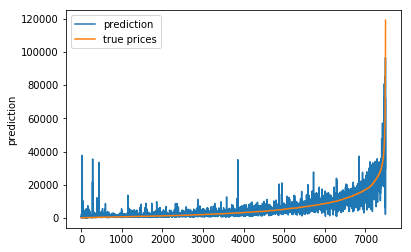

In [24]:
plot_regression(tuned_rfr_preds, y_test)

### Optimized Gradient Boosting

In [25]:
# gbc_params = [{'learning_rate' : [.05, .09, .1, .15, .25, .3], 
#                'n_estimators' : [100, 150, 200, 250, 350, 400, 500, 600]
# }]

# I commented this out so I would not have to run it again and again. It chose learning_rate=0.25 and
# n_estimators=400

In [26]:
# gbc_search = GridSearchCV(estimator=gbc, param_grid=gbc_params, scoring='r2', cv=5)
# gbc_search.fit(X_train, y_train)
# tuned_gbc = gbc_search.best_estimator_

In [27]:
# Ended up choosing learning rate of .25 and 400 estimators
tuned_gbr = ensemble.GradientBoostingRegressor(learning_rate=0.25, n_estimators=400)
tuned_gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.25, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
tuned_gbr_preds = tuned_gbr.predict(X_test)
print(sklearn.metrics.r2_score(y_test, tuned_gbr_preds))

0.8143165411211333


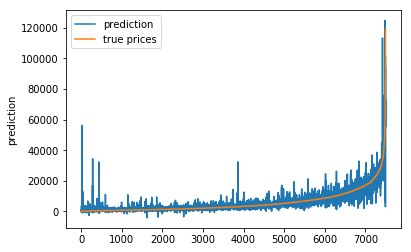

In [29]:
plot_regression(tuned_gbr_preds, y_test)

## Scikit Learn modeling Summary
- Gradient Boosting and Random Forest outperformed other models for predicting price.
- Once tuned, they improved to achieve r2 scores of roughly .82

## Modeling with TensorFlow

In [30]:
# Creating a TensorFlow model to use as a baseline. All parameters are off top of head.

def build_model():
    model = keras.Sequential([
        layers.Dense(160, activation=tf.nn.relu, input_shape=[X_train_scaled.shape[1]]),
        layers.Dense(80, activation=tf.nn.relu),
        layers.Dense(40, activation=tf.nn.relu),
        layers.Dense(20, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    model.compile(loss='mean_squared_error',
                 optimizer='adam',
                 metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [31]:
monitor = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = keras.callbacks.ModelCheckpoint(filepath='best_weights.hdf5', verbose=0, save_best_only=True)

In [32]:
model = build_model()
history = model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test), 
          callbacks=[monitor, checkpointer], 
          verbose=0, epochs=1000)

Epoch 00018: early stopping


Score (RMSE): 4263.795168734416


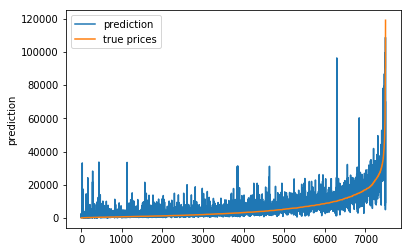

In [33]:
pred = model.predict(X_test_scaled)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Score (RMSE): {}".format(score))

plot_regression(pred.flatten(), y_test)

In [34]:
# Comparing the effectiveness of the TensorFlow Model to the Scikit Learn Models
sklearn.metrics.r2_score(pred, y_test)

0.6889330182719987

In [35]:
# Optimizing the layers using GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(layers, activation):
    model = keras.Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(keras.layers.Dense(nodes,input_dim=X_train_scaled.shape[1]))
            model.add(keras.layers.Activation(activation))
        else:
            model.add(keras.layers.Dense(nodes))
            model.add(keras.layers.Activation(activation))
    model.add(keras.layers.Dense(1)) 
    
    model.compile(optimizer='adam', loss='mse')
    return model
    
model = KerasRegressor(build_fn=create_model, verbose=0) 

Using TensorFlow backend.


In [36]:
layers = [[168, 84, 42, 21]]
activations = [keras.activations.relu]
batch_sizes= [128, 256]
param_grid = dict(layers=layers, activation=activations, batch_size=batch_sizes)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

In [37]:
grid_result = grid.fit(X_train_scaled, y_train,
                       validation_data=(X_test_scaled, y_test),
                       callbacks=[monitor, checkpointer], 
                       verbose=0, epochs=1000)

Epoch 00027: early stopping
Epoch 00025: early stopping
Epoch 00026: early stopping
Epoch 00019: early stopping
Epoch 00038: early stopping
Epoch 00036: early stopping
Epoch 00032: early stopping
Epoch 00030: early stopping
Epoch 00034: early stopping
Epoch 00032: early stopping
Epoch 00026: early stopping


In [38]:
grid_result.best_params_

{'activation': <function tensorflow.python.keras.activations.relu>,
 'batch_size': 128,
 'layers': [168, 84, 42, 21]}

In [39]:
tf_tuned = grid_result.best_estimator_

In [40]:
tf_tuned_pred = tf_tuned.predict(X_test_scaled)

In [41]:
sklearn.metrics.r2_score(tf_tuned_pred, y_test)

0.6752849640517213

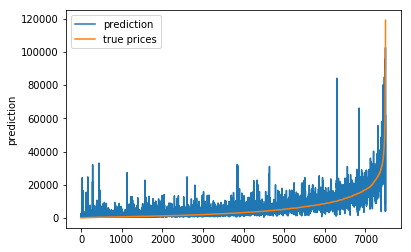

In [42]:
plot_regression(tf_tuned_pred.flatten(), y_test)

# Modeling the Newly Scraped Data
At this point I have created some models to predict the price of cars on the large eBay used cars dataset that I found on Kaggle.com. I also scraped a new dataset, cleaned it, and preprocessed it the same way as the old dataset. I am now ready to run some predictions on this new dataset.

My random forest regressor was the most accurate predictor so I will be using that to run my predictions now.

In [43]:
final_predictions = tuned_rfr.predict(later_features)

In [44]:
# Let's see how close my predictions came to the actual sale prices
sklearn.metrics.r2_score(later_outcome, final_predictions)

0.7433588548263369

That's pretty good for how small the datasets were that I used. The data science product will be finding which of these cars are underpriced. That way we can buy them and make a profit.

In [45]:
results = pd.DataFrame({'name':later_names, 'price':later_outcome, 'assessed value':final_predictions.round(2), 'margin':final_predictions.round(2)-later_outcome})

In [46]:
results

,assessed value,margin,name,price
0,10994.86,994.86,bmw 525xi m paket xenon navi,10000.0
1,3760.50,-1019.50,nissan micra 1.2 edition 25 jahre 1 jahr garan...,4780.0
2,66238.44,-53261.56,porsche 991 carrera 4s cabriolet sportchrono s...,119500.0
3,859.73,-140.27,volkswagen golf 1.6,1000.0
4,4853.90,403.90,mini cabrio sonderausstattung mit tüv leder s...,4450.0
5,13750.96,1260.96,volkswagen passat cc 2.0 tdi bluemotion techno...,12490.0
6,6896.97,-4083.03,smart fortwo coupe passion/cool&audio/jbl/led/...,10980.0
7,7215.12,-5744.88,smart fortwo coupe prime/twinamic/cool&audio/l...,12960.0
8,3135.62,35.62,opel meriva 1.8 16v cosmo mit gasanlage,3100.0
9,4425.12,2625.12,"audi a4 2,5 tdi 6gang 179ps quattro tüv 12.19 ...",1800.0
